# Latent Space Visualization — Deep Learning 

In [24]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import warnings
import random
from datetime import datetime
random.seed(datetime.now())
warnings.filterwarnings('ignore')

# Make plots larger
plt.rcParams['figure.figsize'] = (10, 6)

## Latent Space Visualization 

Deep learning and neural networks are increasingly important concepts as demonstrated through their performance on difficult problems in computer vision, medical diagnosis, natural language processing and many other domains. Deep learning algorithms are unique in that they try to learn latent features from data, as opposed to traditional machine learning where features selection is typically handcrafted. However, the semantics of deep neural networks “hidden layers” are poorly understood, and are often treated as “black box” models.  The aim of _Latent Space Visualization_ is to develop tools and algorithms to better understand the semantics of the latent features learned by deep networks, particularly those used for unsupervised deep learning.


## What is the latent space?  

The word “latent” means “hidden”. In a neural networks some of the data is in the space that you can observe, and other data is within “hidden layers.”  

In _latent Dirichlet allocation (LDA)_ the "latent space" is the vector space within which the vectors that make up the topics found by LDA are found.

In both cases, the "latent space" allows sets of observations to be mapped by unobserved groups that explain why some parts of the data are similar. 



## What numbers exist in the latent space? 

The values in the “hidden layers” are typically numerical weights usually represented as vectors. This means we can plot, calculate distance and similarlity and use any matheimatical technique especially those that work with vectors on the latent space.


The basic idea behind latent space visualization is to map numbers in the _hidden layers_ whose values are usually just weights to output that has meaning.



##  t-SNE visualization

### What’s t-SNE?
   
**t-distributed stochastic neighbor embedding (t-SNE)** is a machine
learning algorithm for dimensionality reduction developed by
Geoffrey Hinton and Laurens van der Maaten. It is a nonlinear
dimensionality reduction technique that is particularly well-suited for
embedding high-dimensional data into a space of two or three dimensions,
which can then be visualized in a scatter plot. Specifically, it
models each high-dimensional object by a two- or three-dimensional point
in such a way that similar objects are modeled by nearby points and
dissimilar objects are modeled by distant points.

The t-SNE algorithm comprises two main stages. 

**Step 1**

First, t-SNE constructs a
probability distribution over pairs of high-dimensional objects in
such a way that similar objects have a high probability of being picked,
whilst dissimilar points have an extremely small probability of being
picked. 

**Step 2**  

Second, t-SNE defines a similar probability distribution over
the points in the low-dimensional map, and it minimizes the
Kullback–Leibler divergence between the two distributions with respect
to the locations of the points in the map. Note that whilst the original
algorithm uses the Euclidean distance between objects as the base of
its similarity metric, this should be changed as appropriate.

**Kullback–Leibler divergence**  

For discrete probability distributions *P* and *Q*, the
Kullback–Leibler divergence from *Q* to *P* is defined^1 to be

$$D_{\mathrm{KL}}(P\|Q) = \sum_i P(i) \, \log\frac{P(i)}{Q(i)}.$$

In other words, it is the expectation of the logarithmic difference
between the probabilities *P* and *Q*, where the expectation is taken
using the probabilities *P*. The Kullback–Leibler divergence is defined
only if *Q*(*i*)=0 implies *P*(*i*)=0, for all *i* (absolute
continuity). Whenever *P*(*i*) is zero the contribution of the *i*-th
term is interpreted as zero because $\lim_{x \to 0} x \log(x) = 0$.

For distributions *P* and *Q* of a continuous random variable, the
Kullback–Leibler divergence is defined to be the integral:  

$$D_{\mathrm{KL}}(P\|Q) = \int_{-\infty}^\infty p(x) \, \log\frac{p(x)}{q(x)} \, dx,$$   

where *p* and *q* denote the densities of *P* and *Q*.

More generally, if *P* and *Q* are probability measures over a set
*X*, and *P* is absolutely continuous with respect to *Q*, then the
Kullback–Leibler divergence from *Q* to *P* is defined as

$$D_{\mathrm{KL}}(P\|Q) = \int_X \log\frac{dP}{dQ} \, dP,$$

where $\frac{dP}{dQ}$ is the Radon–Nikodym derivative of *P* with
respect to *Q*, and provided the expression on the right-hand side
exists. Equivalently, this can be written as

$$D_{\mathrm{KL}}(P\|Q) = \int_X \log\!\left(\frac{dP}{dQ}\right) \frac{dP}{dQ} \, dQ,$$

which we recognize as the entropy of *P* relative to *Q*. Continuing
in this case, if $\mu$ is any measure on *X* for which
$p = \frac{dP}{d\mu}$ and $q = \frac{dQ}{d\mu}$ exist (meaning that *p*
and *q* are absolutely continuous with respect to $\mu$), then the
Kullback–Leibler divergence from *Q* to *P* is given as

$$D_{\mathrm{KL}}(P\|Q) = \int_X p \, \log \frac{p}{q} \, d\mu.
\!$$

The logarithms in these formulae are taken to base 2 if information is
measured in units of bits, or to base *e* if information is measured
in nats. Most formulas involving the Kullback–Leibler divergence hold
regardless of the base of the logarithm.

Various conventions exist for referring to *D*~KL~(*P*‖*Q*) in words.
Often it is referred to as the divergence *between* *P* and *Q*; however
this fails to convey the fundamental asymmetry in the relation.
Sometimes, as in this article, it may be found described as the
divergence of *P* from, or with respect to *Q*. This reflects the
asymmetry in Bayesian inference, which starts *from* a prior *Q* and
updates *to* the posterior *P*.  

### t-SNE algorithm

Given a set of $N$ high-dimensional objects
$\mathbf{x}_1, \dots, \mathbf{x}_N$, t-SNE first computes probabilities
$p_{ij}$ that are proportional to the similarity of objects
$\mathbf{x}_i$ and $\mathbf{x}_j$, as follows:   

 $$p_{j\mid i} = \frac{\exp(-\lVert\mathbf{x}_i - \mathbf{x}_j\rVert^2 / 2\sigma_i^2)}{\sum_{k \neq i} \exp(-\lVert\mathbf{x}_i - \mathbf{x}_k\rVert^2 / 2\sigma_i^2)},$$

As Van der Maaten and Hinton explained : “The similarity of datapoint
$x_j$ to datapoint $x_i$ is the conditional probability, $p_{j|i}$, that
$x_i$ would pick $x_j$ as its neighbor if neighbors were picked in
proportion to their probability density under a Gaussian centered at
$x_i$.”  

 $$p_{ij} = \frac{p_{j\mid i} + p_{i\mid j}}{2N}$$
 
 The bandwidth of the [Gaussian kernels] $\sigma_i$, is set in such a way
that the [perplexity] of the conditional distribution equals a
predefined perplexity using the [bisection method]. As a result, the
bandwidth is adapted to the [density] of the data: smaller values of
$\sigma_i$ are used in denser parts of the data space.

t-SNE aims to learn a $d$-dimensional map
$\mathbf{y}_1, \dots, \mathbf{y}_N$ (with
$\mathbf{y}_i \in \mathbb{R}^d$) that reflects the similarities $p_{ij}$
as well as possible. To this end, it measures similarities $q_{ij}$
between two points in the map $\mathbf{y}_i$ and $\mathbf{y}_j$, using a
very similar approach. Specifically, $q_{ij}$ is defined as:   

   $$q_{ij} = \frac{(1 + \lVert \mathbf{y}_i - \mathbf{y}_j\rVert^2)^{-1}}{\sum_{k \neq m} (1 + \lVert \mathbf{y}_k - \mathbf{y}_m\rVert^2)^{-1}}$$

Herein a heavy-tailed [Student-t distribution] (with one-degree of
freedom, which is the same as a [Cauchy distribution]) is used to
measure similarities between low-dimensional points in order to allow
dissimilar objects to be modeled far apart in the map.

The locations of the points $\mathbf{y}_i$ in the map are determined by
minimizing the (non-symmetric) [Kullback–Leibler divergence] of the
distribution $Q$ from the distribution $P$, that is:   

   $$KL(P||Q) = \sum_{i \neq j} p_{ij} \log \frac{p_{ij}}{q_{ij}}$$

The minimization of the Kullback–Leibler divergence with respect to the
points $\mathbf{y}_i$ is performed using [gradient descent]. The result
of this optimization is a map that reflects the similarities between the
high-dimensional inputs well. 

In [25]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Dense, Convolution2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.callbacks import TensorBoard
from keras.models import model_from_json
import cv2 # pip install opencv-python
import sys
import os
from random import shuffle, randint, choice

In [26]:
# Generates random image with squares and circles
def getRandomImage():
	imageSize = 100
	size = 25
	nbShapes = 5

	xy = lambda: randint(0,100)

	# Create a white image
	img = np.zeros((imageSize,imageSize,3), np.uint8)
	cv2.rectangle(img,(0,0),(imageSize,imageSize),(122,122,122) ,-1)

	greyImg = np.copy(img)

	# Adds some shapes
	for i in range(nbShapes):
		x0, y0 = xy(), xy()
		isRect = choice((True,False))
		if isRect:
			cv2.rectangle(img,(x0,y0),(x0+size,y0+size),(255,0,0) ,-1)
			cv2.rectangle(greyImg,(x0,y0),(x0+size,y0+size),(255,255,255) ,-1)
		else:
			cv2.circle(img,(x0,y0), size/2, (0,0,255), -1)
			cv2.circle(greyImg,(x0,y0), size/2, (255,255,255), -1)

	return cv2.resize(img,(48,48)), cv2.resize(greyImg,(48,48))

In [27]:
# Creates the dataset
def getDataset(display=False):
	# Show what the dataset looks like
	if display:
		colorImg, greyImg = getRandomImage()
		img = np.hstack((colorImg, greyImg))
		cv2.imshow("Dataset",cv2.resize(img,(200,100)))
		cv2.waitKey(0)
		cv2.destroyAllWindows()

	#for i in range

	x_train, x_test, y_train, y_test = [], [], [], []

	# Add training examples
	for i in range(10000):
		colorImg, greyImg = getRandomImage()
		greyImg = cv2.cvtColor(greyImg, cv2.COLOR_RGB2GRAY)
		x_train.append(greyImg.astype('float32')/255.)
		y_train.append(colorImg.astype('float32')/255.)

	# Add test examples
	for i in range(1000):
		colorImg, greyImg = getRandomImage()
		greyImg = cv2.cvtColor(greyImg, cv2.COLOR_RGB2GRAY)
		x_test.append(greyImg.astype('float32')/255.)
		y_test.append(colorImg.astype('float32')/255.)

	# Reshape
	x_train = np.array(x_train).reshape((-1,48,48,1))
	x_test = np.array(x_test).reshape((-1,48,48,1))
	y_train = np.array(y_train).reshape((-1,48,48,3))
	y_test = np.array(y_test).reshape((-1,48,48,3))

	return x_train, y_train, x_test, y_test

In [28]:
# Creates the Convolutional Auto Encoder
def getModel():
	input_img = Input(shape=(48, 48, 1))
	x = Convolution2D(16, 3, 3, activation='relu', border_mode='same', dim_ordering='tf')(input_img)
	x = MaxPooling2D((2, 2), border_mode='same', dim_ordering='tf')(x)
	x = Convolution2D(32, 3, 3, activation='relu', border_mode='same', dim_ordering='tf')(input_img)
	x = MaxPooling2D((2, 2), border_mode='same', dim_ordering='tf')(x)
	x = Convolution2D(64, 3, 3, activation='relu', border_mode='same', dim_ordering='tf')(x)
	encoded = MaxPooling2D((2, 2), border_mode='same', dim_ordering='tf')(x)
	#6x6x32 -- bottleneck
	x = UpSampling2D((2, 2), dim_ordering='tf')(encoded)
	x = Convolution2D(32, 3, 3, activation='relu', border_mode='same', dim_ordering='tf')(x)
	x = UpSampling2D((2, 2), dim_ordering='tf')(x)
	x = Convolution2D(16, 3, 3, activation='relu', border_mode='same', dim_ordering='tf')(x)
	decoded = Convolution2D(3, 3, 3, activation='relu', border_mode='same', dim_ordering='tf')(x)

	#Create model
	autoencoder = Model(input_img, decoded)
	return autoencoder

In [29]:
# Trains the model for 10 epochs
def trainModel():
	# Load dataset
	print("Loading dataset...")
	x_train_gray, x_train, x_test_gray, x_test = getDataset()

	# Create model description
	print("Creating model...")
	model = getModel()
	model.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics=['accuracy'])

	# Train model
	print("Training model...")
	model.fit(x_train_gray, x_train, nb_epoch=10, batch_size=148, shuffle=True, validation_data=(x_test_gray, x_test), callbacks=[TensorBoard(log_dir='/tmp/tb', histogram_freq=0, write_graph=False)])

	# Evaluate loaded model on test data
	print("Evaluating model...")
	score = model.evaluate(x_train_gray, x_train, verbose=0)
	print ("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

	# Serialize model to JSON
	print("Saving model...")
	model_json = model.to_json()
	with open("model.json", "w") as json_file:
	    json_file.write(model_json)
	    
	# Serialize weights to HDF5
	print("Saving weights...")
	model.save_weights("model.h5")


In [30]:
# Tests the model and shows results
def testModel():
	# Load JSON model description
	with open('model.json', 'r') as json_file:
		modelJSON = json_file.read()
	
	# Build model from JSON description
	print("Loading model...")
	model = model_from_json(modelJSON)

	# Load weights
	print("Loading weights...")
	model.load_weights("model.h5")

	_, _, x_test_gray, x_test = getDataset()
	x_test_gray = x_test_gray[:10]
	x_test = x_test[:10]

	print("Making predictions...")
	predictions = model.predict(x_test_gray)
	x_test_gray = [cv2.cvtColor(img,cv2.COLOR_GRAY2RGB) for img in x_test_gray]

	img = np.vstack((np.hstack(x_test_gray),np.hstack(predictions),np.hstack(x_test)))

	cv2.imshow("Input - Reconstructed - Ground truth",cv2.resize(img,(img.shape[1],img.shape[0])))
	cv2.waitKey(0)
	cv2.destroyAllWindows()


## MNIST data

The [MNIST database](http://yann.lecun.com/exdb/mnist/) of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting.

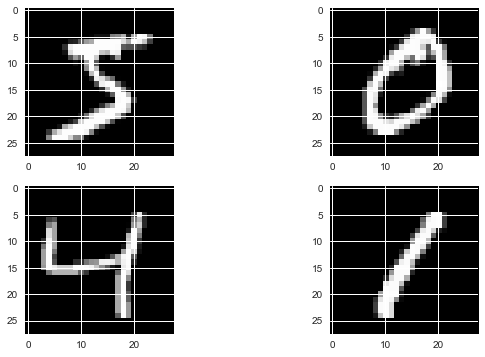

In [31]:
# load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot first 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

##  t-SNE Latent Space Visualization


### t-SNE MNIST visualizations

This example is from [Latent space visualization — Deep Learning bits #2](
https://medium.com/@juliendespois/latent-space-visualization-deep-learning-bits-2-bd09a46920df)


**t-SNE visualization of MNIST validation set**

![t-SNE visualization of MNIST validation set](http://nikbearbrown.com/YouTube/MachineLearning/IMG/t-SNE_visualization_of_MNIST_validation_set.png) 

* t-SNE projection of image space representations from the validation set   
### MNIST autoencoder reconstruction

![MNIST autoencoder reconstruction](http://nikbearbrown.com/YouTube/MachineLearning/IMG/MNIST_autoencoder_reconstruction.png)

The autoencoder successfully reconstructs the digits. The reconstruction is blurry because the input is compressed.

![MNIST autoencoder reconstruction amimation](http://nikbearbrown.com/YouTube/MachineLearning/IMG/MNIST_autoencoder_reconstruction_animation.gif)


**t-SNE projection of latent space representations from the MNIST validation set**

![t-SNE projection of latent space representations from the MNIST validation set](http://nikbearbrown.com/YouTube/MachineLearning/IMG/t-SNE_projection_of_latent_space_representations_from_the_MNIST_validation_set.png)   

* t-SNE projection of latent space representations from the MNIST validation set  


## Code for Latent space visualization — Deep Learning bits #2

Code for Latent space visualization — Deep Learning bits #2 is at [https://github.com/despoisj/LatentSpaceVisualization](https://github.com/despoisj/LatentSpaceVisualization) 

In [32]:
import os
import sys
import h5py
import cv2

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from scipy.stats import norm
from sklearn import manifold

from keras.layers import Input, Dense, Lambda, Flatten, Reshape
from keras.layers import Convolution2D, UpSampling2D, MaxPooling2D
from keras.models import Model
from keras.layers.advanced_activations import ELU
from keras import backend as K
from keras import objectives

# Config

modelsPath = "Models/"
visualsPath = "Visuals/"

imageSize = 28
latent_dim = 32

# Convolutional models
# x is input, z is 
def getModels():
    input_img = Input(shape=(imageSize, imageSize, 1))
    x = Convolution2D(32, 3, 3, border_mode='same')(input_img)
    x = ELU()(x)
    x = MaxPooling2D((2, 2), border_mode='same')(x)

    x = Convolution2D(64, 3, 3, border_mode='same')(x)
    x = ELU()(x)
    x = MaxPooling2D((2, 2), border_mode='same')(x)

    # Latent space // bottleneck layer
    x = Flatten()(x)
    x = Dense(latent_dim)(x)
    z = ELU()(x)

    ##### MODEL 1: ENCODER #####
    encoder = Model(input_img, z)
   
    # We instantiate these layers separately so as to reuse them for the decoder
    # Dense from latent space to image dimension
    x_decoded_dense1 = Dense(7 * 7 * 64)

    # Reshape for image
    x_decoded_reshape0 = Reshape((7, 7, 64))
    x_decoded_upsample0 = UpSampling2D((2, 2))
    x_decoded_conv0  = Convolution2D(32, 3, 3, border_mode='same')

    x_decoded_upsample3 = UpSampling2D((2, 2))
    x_decoded_conv3 = Convolution2D(1, 3, 3, activation='sigmoid', border_mode='same')

    # Create second part of autoencoder
    x_decoded = x_decoded_dense1(z)
    x_decoded = ELU()(x_decoded)

    x_decoded = x_decoded_reshape0(x_decoded)
    x_decoded = x_decoded_upsample0(x_decoded)
    x_decoded = x_decoded_conv0(x_decoded)
    x_decoded = ELU()(x_decoded)

    # Tanh layer
    x_decoded = x_decoded_upsample3(x_decoded)
    decoded_img = x_decoded_conv3(x_decoded)

    ##### MODEL 2: AUTO-ENCODER #####
    autoencoder = Model(input_img, decoded_img)

    # Create decoder
    input_z = Input(shape=(latent_dim,))
    x_decoded_decoder = x_decoded_dense1(input_z)
    x_decoded_decoder = ELU()(x_decoded_decoder)

    x_decoded_decoder = x_decoded_reshape0(x_decoded_decoder)
    x_decoded_decoder = x_decoded_upsample0(x_decoded_decoder)
    x_decoded_decoder = x_decoded_conv0(x_decoded_decoder)
    x_decoded_decoder = ELU()(x_decoded_decoder)

    # Tanh layer
    x_decoded_decoder = x_decoded_upsample3(x_decoded_decoder)
    decoded_decoder_img = x_decoded_conv3(x_decoded_decoder)

    ##### MODEL 3: DECODER #####
    decoder = Model(input_z, decoded_decoder_img)
    return autoencoder, encoder, decoder

In [33]:
import os
import sys
import h5py
import cv2

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from scipy.stats import norm
from sklearn import manifold

from keras.layers import Input, Dense, Lambda, Flatten, Reshape
from keras.layers import Convolution2D, UpSampling2D, MaxPooling2D
from keras.models import Model
from keras.layers.advanced_activations import ELU
from keras import backend as K
from keras import objectives

# Convolutional models
# x is input, z is 
def getModels():
    input_img = Input(shape=(imageSize, imageSize, 1))
    x = Convolution2D(32, 3, 3, border_mode='same')(input_img)
    x = ELU()(x)
    x = MaxPooling2D((2, 2), border_mode='same')(x)

    x = Convolution2D(64, 3, 3, border_mode='same')(x)
    x = ELU()(x)
    x = MaxPooling2D((2, 2), border_mode='same')(x)

    # Latent space // bottleneck layer
    x = Flatten()(x)
    x = Dense(latent_dim)(x)
    z = ELU()(x)

    ##### MODEL 1: ENCODER #####
    encoder = Model(input_img, z)
   
    # We instantiate these layers separately so as to reuse them for the decoder
    # Dense from latent space to image dimension
    x_decoded_dense1 = Dense(7 * 7 * 64)

    # Reshape for image
    x_decoded_reshape0 = Reshape((7, 7, 64))
    x_decoded_upsample0 = UpSampling2D((2, 2))
    x_decoded_conv0  = Convolution2D(32, 3, 3, border_mode='same')

    x_decoded_upsample3 = UpSampling2D((2, 2))
    x_decoded_conv3 = Convolution2D(1, 3, 3, activation='sigmoid', border_mode='same')

    # Create second part of autoencoder
    x_decoded = x_decoded_dense1(z)
    x_decoded = ELU()(x_decoded)

    x_decoded = x_decoded_reshape0(x_decoded)
    x_decoded = x_decoded_upsample0(x_decoded)
    x_decoded = x_decoded_conv0(x_decoded)
    x_decoded = ELU()(x_decoded)

    # Tanh layer
    x_decoded = x_decoded_upsample3(x_decoded)
    decoded_img = x_decoded_conv3(x_decoded)

    ##### MODEL 2: AUTO-ENCODER #####
    autoencoder = Model(input_img, decoded_img)

    # Create decoder
    input_z = Input(shape=(latent_dim,))
    x_decoded_decoder = x_decoded_dense1(input_z)
    x_decoded_decoder = ELU()(x_decoded_decoder)

    x_decoded_decoder = x_decoded_reshape0(x_decoded_decoder)
    x_decoded_decoder = x_decoded_upsample0(x_decoded_decoder)
    x_decoded_decoder = x_decoded_conv0(x_decoded_decoder)
    x_decoded_decoder = ELU()(x_decoded_decoder)

    # Tanh layer
    x_decoded_decoder = x_decoded_upsample3(x_decoded_decoder)
    decoded_decoder_img = x_decoded_conv3(x_decoded_decoder)

    ##### MODEL 3: DECODER #####
    decoder = Model(input_z, decoded_decoder_img)
    return autoencoder, encoder, decoder


In [34]:
# Loads the dataset - here Normalized MNIST
def loadDataset():
    from keras.datasets import mnist
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    X_train = X_train.reshape([-1,28,28,1])/255.
    X_test = X_test.reshape([-1,28,28,1])/255.
    return X_train, X_test

In [35]:
import os
import sys
import h5py
import cv2
import math
import random, string

import numpy as np
from scipy.stats import norm
from sklearn import manifold
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas


# Show every image, good for picking interplation candidates
def visualizeDataset(X):
    for i,image in enumerate(X):
        cv2.imshow(str(i),image)
        cv2.waitKey()
        cv2.destroyAllWindows()

# Scatter with images instead of points
def imscatter(x, y, ax, imageData, zoom):
    images = []
    for i in range(len(x)):
        x0, y0 = x[i], y[i]
        # Convert to image
        img = imageData[i]*255.
        img = img.astype(np.uint8).reshape([imageSize,imageSize])
        img = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
        # Note: OpenCV uses BGR and plt uses RGB
        image = OffsetImage(img, zoom=zoom)
        ab = AnnotationBbox(image, (x0, y0), xycoords='data', frameon=False)
        images.append(ax.add_artist(ab))
    
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()

# Show dataset images with T-sne projection of latent space encoding
def computeTSNEProjectionOfLatentSpace(X, encoder, display=True):
    # Compute latent space representation
    print("Computing latent space projection...")
    X_encoded = encoder.predict(X)

    # Compute t-SNE embedding of latent space
    print("Computing t-SNE embedding...")
    tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
    X_tsne = tsne.fit_transform(X_encoded)

    # Plot images according to t-sne embedding
    if display:
        print("Plotting t-SNE visualization...")
        fig, ax = plt.subplots()
        imscatter(X_tsne[:, 0], X_tsne[:, 1], imageData=X, ax=ax, zoom=0.6)
        plt.show()
    else:
        return X_tsne

# Show dataset images with T-sne projection of pixel space
def computeTSNEProjectionOfPixelSpace(X, display=True):
    # Compute t-SNE embedding of latent space
    print("Computing t-SNE embedding...")
    tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
    X_tsne = tsne.fit_transform(X.reshape([-1,imageSize*imageSize*1]))

    # Plot images according to t-sne embedding
    if display:
        print("Plotting t-SNE visualization...")
        fig, ax = plt.subplots()
        imscatter(X_tsne[:, 0], X_tsne[:, 1], imageData=X, ax=ax, zoom=0.6)
        plt.show()
    else:
        return X_tsne

# Reconstructions for samples in dataset
def getReconstructedImages(X, autoencoder):
    nbSamples = X.shape[0]
    nbSquares = int(math.sqrt(nbSamples))
    nbSquaresHeight = 2*nbSquares
    nbSquaresWidth = nbSquaresHeight
    resultImage = np.zeros((nbSquaresHeight*imageSize,nbSquaresWidth*imageSize/2,X.shape[-1]))

    reconstructedX = autoencoder.predict(X)

    for i in range(nbSamples):
        original = X[i]
        reconstruction = reconstructedX[i]
        rowIndex = i%nbSquaresWidth
        columnIndex = (i-rowIndex)/nbSquaresHeight
        resultImage[rowIndex*imageSize:(rowIndex+1)*imageSize,columnIndex*2*imageSize:(columnIndex+1)*2*imageSize,:] = np.hstack([original,reconstruction])

    return resultImage

# Reconstructions for samples in dataset
def visualizeReconstructedImages(X_train, X_test, autoencoder, save=False, label=False):
    trainReconstruction = getReconstructedImages(X_train,autoencoder)
    testReconstruction = getReconstructedImages(X_test,autoencoder)

    if not save:
        print("Generating 10 image reconstructions...")

    result = np.hstack([trainReconstruction,np.zeros([trainReconstruction.shape[0],5,trainReconstruction.shape[-1]]),testReconstruction])
    result = (result*255.).astype(np.uint8)

    if save:
        cv2.imwrite(visualsPath+"reconstructions_{}.png".format(label),result)
    else:
        cv2.imshow("Reconstructed images (train - test)",result)
        cv2.waitKey()
        cv2.destroyAllWindows()

# Computes A, B, C, A+B, A+B-C in latent space
def visualizeArithmetics(a, b, c, encoder, decoder):
    print("Computing arithmetics...")
    # Create micro batch
    X = np.array([a,b,c])

    # Compute latent space projection
    latentA, latentB, latentC = encoder.predict(X)

    add = latentA+latentB
    addSub = latentA+latentB-latentC

    # Create micro batch
    X = np.array([latentA,latentB,latentC,add,addSub])

    # Compute reconstruction
    reconstructedA, reconstructedB, reconstructedC, reconstructedAdd, reconstructedAddSub = decoder.predict(X)

    cv2.imshow("Arithmetics in latent space",np.hstack([reconstructedA, reconstructedB, reconstructedC, reconstructedAdd, reconstructedAddSub]))
    cv2.waitKey()

# Shows linear inteprolation in image space vs latent space
def visualizeInterpolation(start, end, encoder, decoder, save=False, nbSteps=5):
    print("Generating interpolations...")

    # Create micro batch
    X = np.array([start,end])

    # Compute latent space projection
    latentX = encoder.predict(X)
    latentStart, latentEnd = latentX

    # Get original image for comparison
    startImage, endImage = X

    vectors = []
    normalImages = []
    #Linear interpolation
    alphaValues = np.linspace(0, 1, nbSteps)
    for alpha in alphaValues:
        # Latent space interpolation
        vector = latentStart*(1-alpha) + latentEnd*alpha
        vectors.append(vector)
        # Image space interpolation
        blendImage = cv2.addWeighted(startImage,1-alpha,endImage,alpha,0)
        normalImages.append(blendImage)

    # Decode latent space vectors
    vectors = np.array(vectors)
    reconstructions = decoder.predict(vectors)

    # Put final image together
    resultLatent = None
    resultImage = None

    if save:
        hashName = ''.join(random.choice(string.lowercase) for i in range(3))

    for i in range(len(reconstructions)):
        interpolatedImage = normalImages[i]*255
        interpolatedImage = cv2.resize(interpolatedImage,(50,50))
        interpolatedImage = interpolatedImage.astype(np.uint8)
        resultImage = interpolatedImage if resultImage is None else np.hstack([resultImage,interpolatedImage])

        reconstructedImage = reconstructions[i]*255.
        reconstructedImage = reconstructedImage.reshape([28,28])
        reconstructedImage = cv2.resize(reconstructedImage,(50,50))
        reconstructedImage = reconstructedImage.astype(np.uint8)
        resultLatent = reconstructedImage if resultLatent is None else np.hstack([resultLatent,reconstructedImage])
    
        if save:
            cv2.imwrite(visualsPath+"{}_{}.png".format(hashName,i),np.hstack([interpolatedImage,reconstructedImage]))

        result = np.vstack([resultImage,resultLatent])

    if not save:
        cv2.imshow("Interpolation in Image Space vs Latent Space",result)
        cv2.waitKey()
        cv2.destroyAllWindows()

## Visualize Features of a Convolutional Neural Network

Matworks MATLAB docs describe how to [Visualize Features of a Convolutional Neural Network](https://www.mathworks.com/help/nnet/examples/visualize-features-of-a-convolutional-neural-network.html)    

and how to [Visualize Activations of a Convolutional Neural Network](https://www.mathworks.com/help/nnet/examples/visualize-activations-of-a-convolutional-neural-network.html)    


## t-SNE visualization of CNN codes

@karpathy took 50,000 ILSVRC 2012 validation images, extracted the 4096-dimensional fc7 CNN (Convolutional Neural Network) features using Caffe and then used Barnes-Hut t-SNE to compute a 2-dimensional embedding that respects the high-dimensional (L2) distances. In other words, t-SNE arranges images that have a similar CNN (fc7) code nearby in the embedding.


'fc7'      Fully Connected               4096 fully connected layer

Not sure of his mapping?


From [ImageNet Classification with Deep Convolutional
Neural Networks](http://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf)  


"Another way to probe the network’s visual knowledge is to consider the feature activations induced by an image at the last, 4096-dimensional hidden layer. If two images produce feature activation vectors with a small Euclidean separation, we can say that the higher levels of the neural network consider them to be similar. Figure 4 shows five images from the test set and the six images from the training set that are most similar to each of them according to this measure. Notice that at the pixel level, the retrieved training images are generally not close in L2 to the query images in the first column. For example, the retrieved dogs and elephants appear in a variety of poses. We present the
results for many more test images in the supplementary material."

![ImageNet Classification with Deep Convolutional Neural Networks Figure 5](http://nikbearbrown.com/YouTube/MachineLearning/IMG/ImageNet_Classification_with_Deep_Convolutional_Neural_Networks_Fig_5.png)

* ImageNet Classification with Deep Convolutional Neural Networks Figure 5  


See [t-SNE visualization of CNN codes](http://cs.stanford.edu/people/karpathy/cnnembed/)  

![http://cs.stanford.edu/people/karpathy/cnnembed/cnn_embed_1k.jpg](http://cs.stanford.edu/people/karpathy/cnnembed/cnn_embed_1k.jpg)  

[http://cs.stanford.edu/people/karpathy/cnnembed/cnn_embed_1k.jpg](http://cs.stanford.edu/people/karpathy/cnnembed/cnn_embed_1k.jpg) 

![http://cs.stanford.edu/people/karpathy/cnnembed/cnn_embed_4k.jpg](http://cs.stanford.edu/people/karpathy/cnnembed/cnn_embed_4k.jpg)  

[http://cs.stanford.edu/people/karpathy/cnnembed/cnn_embed_4k.jpg](http://cs.stanford.edu/people/karpathy/cnnembed/cnn_embed_4k.jpg)  

![http://cs.stanford.edu/people/karpathy/cnnembed/cnn_embed_6k.jpg](http://cs.stanford.edu/people/karpathy/cnnembed/cnn_embed_6k.jpg)  

[http://cs.stanford.edu/people/karpathy/cnnembed/cnn_embed_6k.jpg](http://cs.stanford.edu/people/karpathy/cnnembed/cnn_embed_6k.jpg)  


And below, embeddings where every position is filled with its nearest neighbor. Note that since the actual embedding is roughly circular, this leads to a visualization where the corners are a little "stretched" out and over-represented:  


![http://cs.stanford.edu/people/karpathy/cnnembed/cnn_embed_full_1k.jpg](http://cs.stanford.edu/people/karpathy/cnnembed/cnn_embed_full_1k.jpg)  

[http://cs.stanford.edu/people/karpathy/cnnembed/cnn_embed_full_1k.jpg](http://cs.stanford.edu/people/karpathy/cnnembed/cnn_embed_full_1k.jpg)

![http://cs.stanford.edu/people/karpathy/cnnembed/cnn_embed_full_4k.jpg](http://cs.stanford.edu/people/karpathy/cnnembed/cnn_embed_full_4k.jpg)  

[http://cs.stanford.edu/people/karpathy/cnnembed/cnn_embed_full_4k.jpg](http://cs.stanford.edu/people/karpathy/cnnembed/cnn_embed_full_4k.jpg)  

![http://cs.stanford.edu/people/karpathy/cnnembed/cnn_embed_full_6k.jpg](http://cs.stanford.edu/people/karpathy/cnnembed/cnn_embed_full_6k.jpg)  

[http://cs.stanford.edu/people/karpathy/cnnembed/cnn_embed_full_6k.jpg](http://cs.stanford.edu/people/karpathy/cnnembed/cnn_embed_full_6k.jpg)  


**final visualization**  

![http://cs.stanford.edu/people/karpathy/cnnembed/cnn_embed_full_4k_seams.jpg](http://cs.stanford.edu/people/karpathy/cnnembed/cnn_embed_full_4k_seams.jpg)  

[http://cs.stanford.edu/people/karpathy/cnnembed/cnn_embed_full_4k_seams.jpg](http://cs.stanford.edu/people/karpathy/cnnembed/cnn_embed_full_4k_seams.jpg)  

 

## Linear interpolation in latent space

A linear interpolation (LERP) takes two vectors and an alpha value and returns a new vector that represents the interpolation between the two input vectors. 

![LERP](http://nikbearbrown.com/YouTube/MachineLearning/IMG/LERP.png)


See LERP - Linear Interpolation [https://youtu.be/0MHkgPqc-P4](https://youtu.be/0MHkgPqc-P4)

## Linear interpolation in MNIST latent space

We take the same start and end images and feed them to the encoder to obtain their latent space representation. We then interpolate between the two latent vectors, and feed these to the decoder.

![LERP](http://nikbearbrown.com/YouTube/MachineLearning/IMG/LERP.png)

![LERP Two Three](http://nikbearbrown.com/YouTube/MachineLearning/IMG/LERP_Two_Three.png)

![LERP Five Seven](http://nikbearbrown.com/YouTube/MachineLearning/IMG/LERP_Five_Seven.png)


## Latent space arithmetics

We can also do arithmetics in the latent space. This means that instead of interpolating, we can add or subtract latent space representations.

### Vector addition

![Vector addition and scalar multiplication](http://nikbearbrown.com/YouTube/MachineLearning/IMG/530px-Vector_add_scale.svg.png)

* Vector addition and scalar multiplication: a vector v (blue) is added to another vector w (red, upper illustration). Below, w is stretched by a factor of 2, yielding the sum v + 2w.   


For example with faces, man with glasses - man without glasses + woman without glasses = woman with glasses. This technique gives mind-blowing results.

![Latent_space_arithmetics.gif](http://nikbearbrown.com/YouTube/MachineLearning/IMG/Latent_space_arithmetics.gif)

## Visualizing the Latent Space of Vector Drawings from the Google QuickDraw Dataset with SketchRNN, PCA and t-SNE

Visualizing the Latent Space of Vector Drawings from the Google QuickDraw Dataset with SketchRNN, PCA and t-SNE [http://louistiao.me/posts/notebooks/visualizing-the-latent-space-of-vector-drawings-from-the-google-quickdraw-dataset-with-sketchrnn-pca-and-t-sne/](http://louistiao.me/posts/notebooks/visualizing-the-latent-space-of-vector-drawings-from-the-google-quickdraw-dataset-with-sketchrnn-pca-and-t-sne/)   


![SketchRNN](http://nikbearbrown.com/YouTube/MachineLearning/IMG/SketchRNN.png)


![SketchRNN cluster](http://nikbearbrown.com/YouTube/MachineLearning/IMG/SketchRNN_cluster.png)



Last update October 3, 2017 

The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT).